### Code to look at a specific brown dwarf and see if there are any astrometric microlensing events in the near future.

In [1]:
# add path to module so can import
import sys
sys.path = ['/users/judah/mlfinder'] + sys.path

# basic imports
from astropy.io import ascii
from astropy.table import Table

import pandas as pd
import numpy as np

# import module
from mlfinder.bd import BrownDwarf
from mlfinder.fields import Fields
from mlfinder.events import FindEvents

**Getting my brown dwarf data...**

In [2]:
# function to get only the number in a str (no +-). used in cell below
def number_only(string):
    string = str(string.replace(" ", ""))
    
    for i in range(len(string)):
        try:
            float(string)
            return string
        except:
            return number_only(string[:len(string) - 1])

In [17]:
candidate_stars = pd.read_csv('apjsaaf6aft4_ascii.txt', sep='\t')
candidate_stars = candidate_stars[['(1)', '(2)', '(4)', '(6)', '(8)', '(9)']]

# rename columns
candidate_stars.rename(columns = {'(1)':'object_name', '(2)':'ra', '(4)':'dec',
                                  '(6)':'pi', '(8)':'mu_alpha', '(9)':'mu_delta'}, 
                                  inplace=True)

brown_dwarf = pd.DataFrame(candidate_stars.iloc[list(candidate_stars['object_name']).index('WISE 0855-0714'), :]).T

# grab only numbers (complicated to get value because brown dwarf is subsection of candidate_stars)
print(brown_dwarf['pi'].values[0])
brown_dwarf['pi'] = number_only(str(brown_dwarf['pi'].values)
brown_dwarf['mu_alpha'] = number_only(brown_dwarf['mu_alpha'])
brown_dwarf['mu_delta'] = number_only(brown_dwarf.loc[50,:]['mu_delta'])

brown_dwarf.columns.values

array(['object_name', 'ra', 'dec', 'pi', 'mu_alpha', 'mu_delta'],
      dtype=object)

In [18]:
brown_dwarf

,object_name,ra,dec,pi,mu_alpha,mu_delta
50,WISE 0855-0714,133.787,-7.24443,438.9,50,679.3


**Creating the brown dwarf class, fields class, and getting the events.**

In [4]:
bd = BrownDwarf(brown_dwarf)

bd_path = bd.find_path(start='2020-Jan-01', end='2030-Jan-01')

In [5]:
stars = Fields(bd=bd, file=r'C:\Users\judah\candidate_stars_background\dr8\0855-0714_bs.txt')

In [6]:
events = FindEvents(bd, stars, 5)

events.event_table

,decals_id,ra,dec,dered_mag_r,gaia_pointsource,time,bd_ra,bd_dec,sep,delta_ml
0,7.696600e+15,-0.001426,0.000926,22.0466,0.0,2020.666667,-0.001463,0.000140,2.834455,166.105416
1,7.696600e+15,-0.015178,0.001579,20.9807,0.0,2026.747433,-0.015240,0.001282,1.090253,63.891282


**Taking a look at the plot of the dwarf itself:**

**Note I set *gaia_check=True* because I was checking how many background stars were *Gaia* pointsources.**

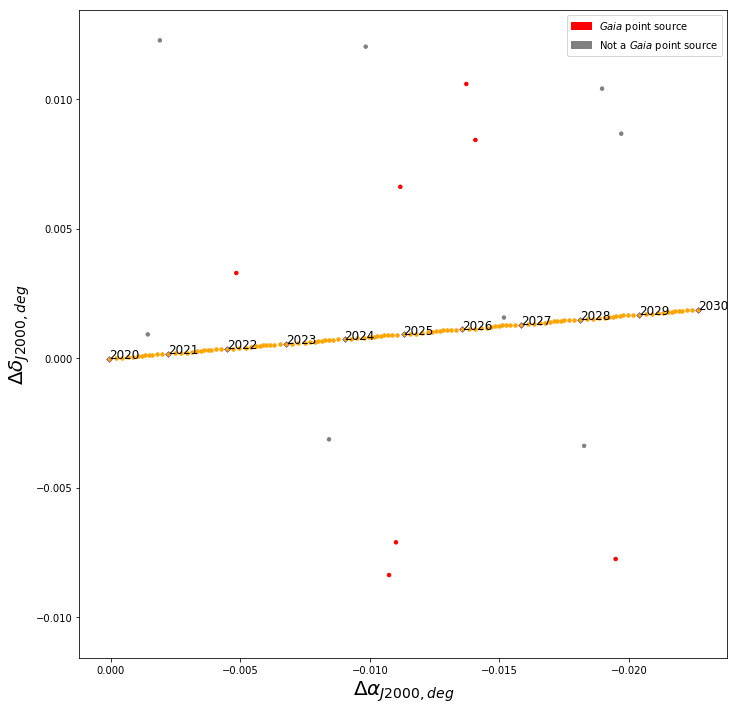

In [7]:
event_path_fig = events.plot_event_path(zoom=0.05, gaia_check=True, point_size=12, font_size=12)

**That looks good, so let's move onto the centroid shift.**

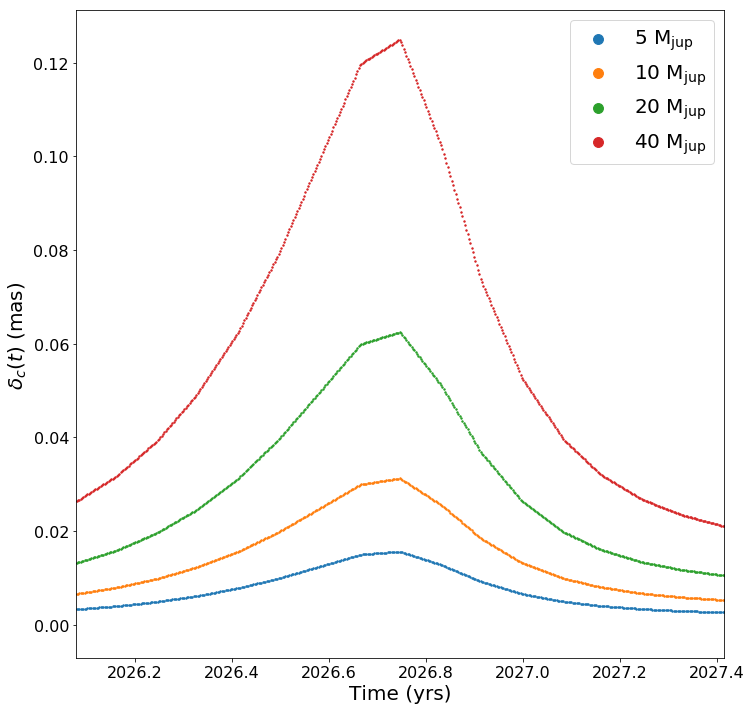

In [8]:
shift = events.centroid_shift(which=1)

centroid_shift_fig = events.plot_shift()